In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile
from IPython.display import Audio

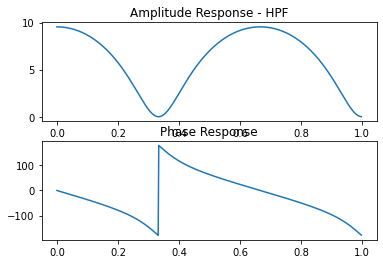

In [2]:
h = [1, 1] # LPF
h = [1, -1] # HPF
h = [1, 0, 1] # Comb Filter
h = [1, 0, -1] # BPF
h = [1, 0, 0, 2]
# h = [1, 2, 1] # Two Series LPF
# h = [0.25, 0.5, 0.25] # Two Series LPF Normalized

[W, H] = signal.freqz(h)

Hamp = abs(H)
Hphase = np.angle(H)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response - HPF')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')
plt.show()

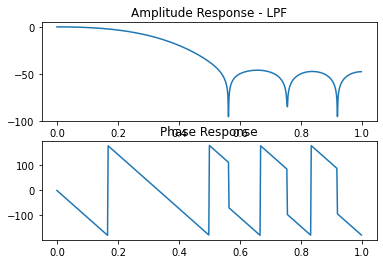

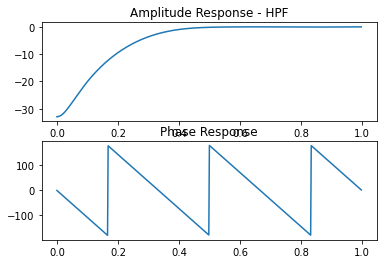

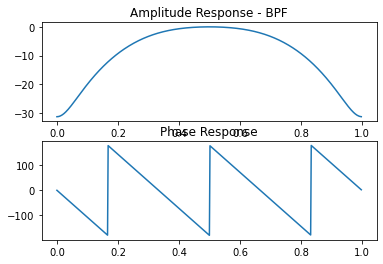

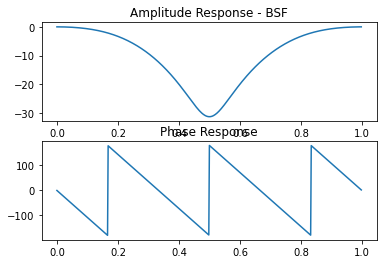

In [3]:
# FIR1EXAMPLE
# This script demonstrates the various uses of the 'signal.firwin' filter function
#
# See also FIR1

# Declare initial parameters for filters
Fs = 48000
nyq = Fs/2

n = 12 # order of filter = number of delay lines + 1
if not n % 2: n += 1 # make sure it's an odd number

f1 = 6000.0 # cutoff frequency (Hz)
Wn = f1/nyq

# Syntax for low-pass filter
h_lpf = signal.firwin(n, Wn, window='hamming', pass_zero='lowpass')

# Syntax for high-pass filter
h_hpf = signal.firwin(n, Wn, window='hamming', pass_zero='highpass')

# Declare second frequency for BPF and BSF
f2 = 18000
Wn2 = f2/nyq

# Syntax for band-pass filter
h_bpf = signal.firwin(n,[Wn, Wn2], window='hamming', pass_zero='bandpass')

# Syntax for band-stop filter
h_bsf = signal.firwin(n,[Wn, Wn2], window='hamming', pass_zero='bandstop')

# Plots
# Low-pass filter
W, H = signal.freqz(h_lpf)
Hamp = abs(H)
Hphase = np.angle(H)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response - LPF')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')

# High-pass filter
W, H = signal.freqz(h_hpf)
Hamp = abs(H)
Hphase = np.angle(H)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response - HPF')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')

# Band-pass filter
W, H = signal.freqz(h_bpf)
Hamp = abs(H)
Hphase = np.angle(H)

plt.figure(3)
plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response - BPF')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')

# Band-stop filter
W, H = signal.freqz(h_bsf)
Hamp = abs(H)
Hphase = np.angle(H)

plt.figure(4)
plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response - BSF')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')
plt.show()

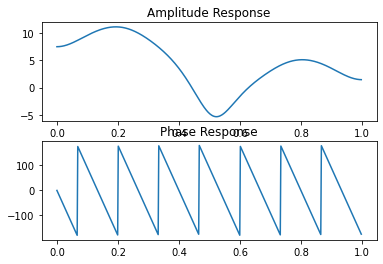

In [4]:
# FIR2EXAMPLE
# This script demonstrates the syntax of the 'signal.firwin2' function to
# create a filter with arbitrary frequency response.
#
# See also FIR2

n = 31 # filter order
freqs = [0, 0.2, 0.5, 0.8, 1] # normalized frequencies
amps = [2, 4, 0.25, 2, 1] # linear amplitudes for each freq

# Syntax for function
h = signal.firwin2(n, freqs, amps)

# Plot frequency response
W, H = signal.freqz(h)
Hamp = abs(H)
Hphase = np.angle(H)

plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')
plt.show()

In [5]:
# CONVOLUTIONFILTERING
# This script demonstrates how to use a built-in FIR filter design function
# to create the impulse response for an LPF. Then, the filtering is performed
# on an audio signal using the convolution operation.

# Import audio file
[x, Fs] = soundfile.read('AcGtr.wav')
Nyq = Fs/2

n = 30 # Order of the filter

freqHz = 500 # frequency in Hz
Wn = freqHz/Nyq # Normalized frequency for firwin

h = signal.firwin(n, Wn, window='hamming', pass_zero='lowpass') # filter design function
# 'h' is the impulse response of the filter

# Convolution applies the filter to a signal
y = np.convolve(x, h)

Audio(y, rate=Fs)

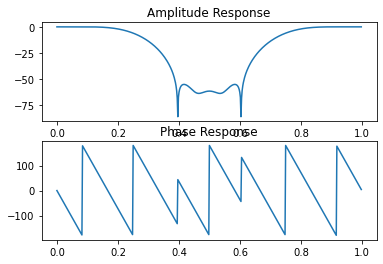

In [6]:
# BANDSTOPFILTER
# This script creates a band-stop filter by performing parallel processing
# with an LPF and HPF.
#
# See also FIR1

# Design filters
# Note: W_lpf must be less than W_hpf to create a band-stop filter
order = 24
if not order % 2: order += 1

W_lpf = 0.25 # Normalized freq of LPF
lpf = signal.firwin(order, W_lpf, window='hamming', pass_zero='lowpass')

W_hpf = 0.75 # Normalized freq of HPF
hpf = signal.firwin(order, W_hpf, window='hamming', pass_zero='highpass')

# Impulse input signal
input = [1, 0]

# Separately, find impulse response of LPF and HPF
u = np.convolve(input, lpf)
w = np.convolve(input, hpf)

# Create combined parallel output by adding together IRs
output = u + w

# Plot the frequency response
W, H = signal.freqz(output)
Hamp = abs(H)
Hphase = np.angle(H)

plt.subplot(2,1,1)
plt.plot(W/np.pi, 20*np.log10(Hamp))
plt.title('Amplitude Response')
plt.subplot(2,1,2)
plt.plot(W/np.pi, Hphase*(180/np.pi))
plt.title('Phase Response')
plt.show()

(20.0, 20000.0, -30.0, 0.0)

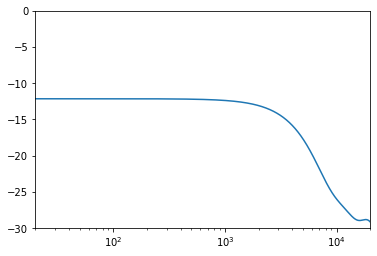

In [20]:
# PINKNOISE1
# This script synthesizes an approximation of pink noise using an FIR filter.
#
# Pink noise can be created by filtering white noise. The amplitude response
# of the filter has a gain of 1/sqrt(f), where 'f' is the frequency (Hz).
#
# See also FIR2

Fs = 48000 # Sampling rate
Nyq = Fs/2 # Nyquist frequency for normalization
sec = 5 # 5 seconds of noise
white = np.random.randn(sec*Fs, 1)

f = 20 # starting frequency in Hz

numFreqs = int(np.floor(np.log2(Nyq/f)+1))
freqs = np.zeros(numFreqs)
gains = np.zeros(numFreqs)

for freq in range(numFreqs):
    # Normalized frequency vector
    freqs[freq] = f/Nyq
    # Amplitude vector, gain = 1/sqrt(f)
    gains[freq] = 1/np.sqrt(f)

    f = f*2

# Set starting frequency and amplitude
freqs = np.append(0, freqs)
gains = np.append(1/np.sqrt(20), gains)

# Set frequency and amplitude at Nyquist
freqs = np.append(freqs, 1)
gains = np.append(gains, 1/np.sqrt(Nyq))

# Filter normalization factor to unity gain
unity = np.sqrt(20)
gainNorm = unity * gains

# Plot frequency response of filter
order = 11
h = signal.firwin2(numtaps=order, freq=freqs, gain=gainNorm)
F, H = signal.freqz(h, worN=4096, fs=Fs)

plt.semilogx(F, 20 * np.log10(abs(H)))
plt.axis([20, 20000, -30, 0])
